In [1]:
grouped = df.groupby(['sex_1', 'target'])
graph = grouped.size().plot(kind='bar')
graph.set_xlabel("(Male, Heart Disease)")


NameError: name 'df' is not defined

Text(0.5, 0, '(Age, Heart Disease)')

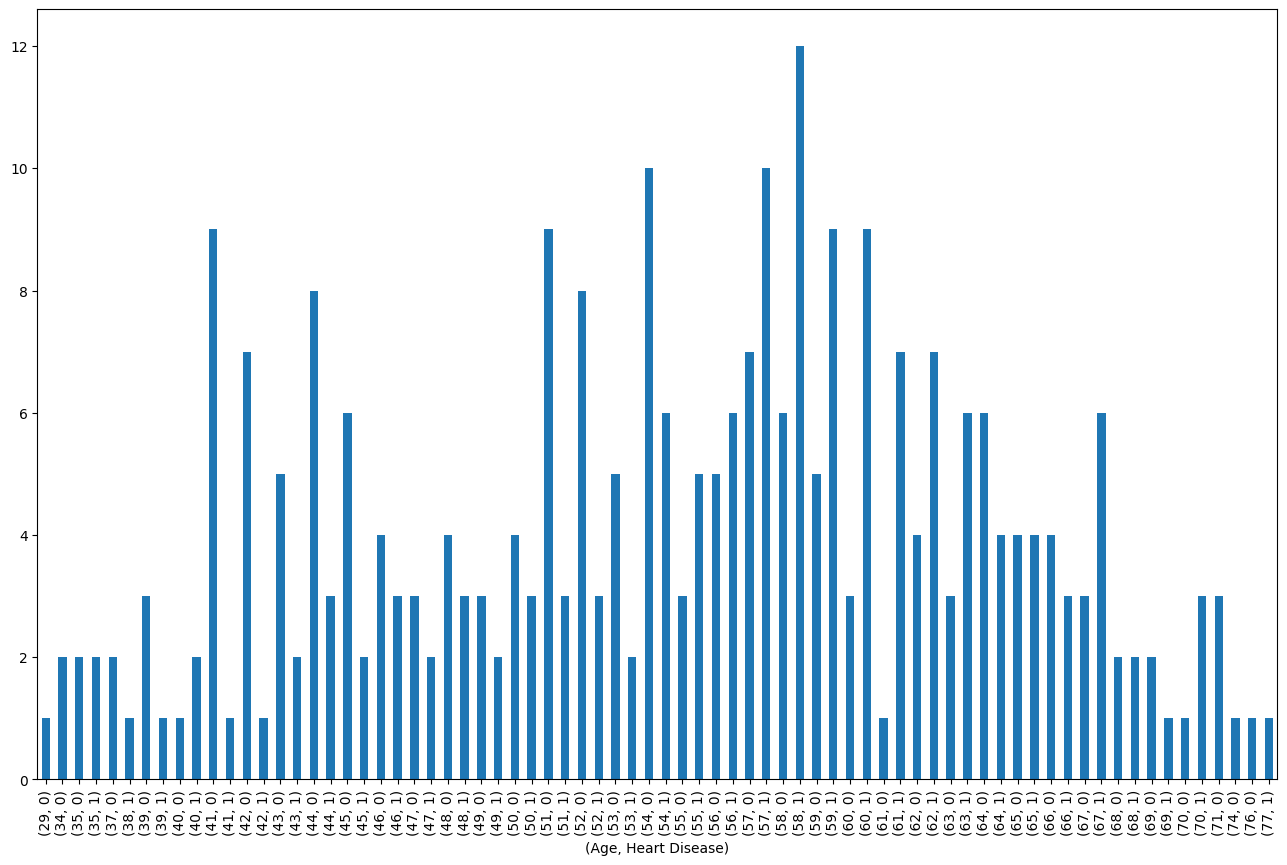

In [ ]:
grouped = df.groupby(['age', 'target'])
graph = grouped.size().plot(figsize=(16, 10), kind='bar')
graph.set_xlabel("(Age, Heart Disease)")